# Exploratory Data Analysis of a Hospital Network's Encounter-Level Dataset


Exploring the Synthea Healthcare encounter-level dataset. Using descriptive statistical methods to understand the data, make findings, and draw meaningful insights to help optimise capacity planning, care pathways, and readmission reduction using historical encounter-level data.

In [1281]:
# importing all necessary packages
import warnings
warnings.filterwarnings("ignore") #disabling warnings in the notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Understading the Hospital Network Encounter-Level Dataset
### Importing and Preparing the Data

In [1282]:
#importing the dataset
encounter_lvl_df = pd.read_csv("./data/synthea_healthcare_data.csv")
encounter_lvl_df.head()

,ID,PATIENT,START,STOP,MONTH,ENCOUNTERCLASS,PROVIDER,REASONCODE,REASONDESCRIPTION,LOS_DAYS,TOTAL_COST,AGE_AT_START,PRIMARY_DIAG_CODE,PRIMARY_DIAG_DESC,CONDITION_COUNT
0,748f8357-6cc7-551d-f31a-32fa2cf84126,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-02-17 05:07:38,2019-02-17 05:22:38,2019-02-01,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,NaN,NaN,0.010417,877.79,0.000000,410620009,Well child visit (procedure),NaN
1,5a4735ae-423f-6563-28ab-b3d11b49b2d4,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-03-24 05:07:38,2019-03-24 05:22:38,2019-03-01,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,NaN,NaN,0.010417,269.68,0.095825,410620009,Well child visit (procedure),NaN
2,0bee1ce6-3e2c-5506-f71c-a7ba8f64a3d3,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-05-26 05:07:38,2019-05-26 05:22:38,2019-05-01,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,NaN,NaN,0.010417,1292.75,0.268309,410620009,Well child visit (procedure),NaN
3,6e93bcf9-45a4-8528-0120-1c1eaa930faf,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-07-28 05:07:38,2019-07-28 05:22:38,2019-07-01,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,NaN,NaN,0.010417,1323.87,0.440794,410620009,Well child visit (procedure),NaN
4,8b6787c3-4316-a0cb-899d-4746525c319f,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-10-27 05:07:38,2019-10-27 05:22:38,2019-10-01,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,NaN,NaN,0.010417,831.76,0.689938,410620009,Well child visit (procedure),NaN


In [1283]:
encounter_lvl_df.shape #showing the size of the dataset

(61459, 15)

In [1284]:
encounter_lvl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61459 entries, 0 to 61458
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 61459 non-null  object 
 1   PATIENT            61459 non-null  object 
 2   START              61459 non-null  object 
 3   STOP               61459 non-null  object 
 4   MONTH              61459 non-null  object 
 5   ENCOUNTERCLASS     61459 non-null  object 
 6   PROVIDER           61459 non-null  object 
 7   REASONCODE         15957 non-null  float64
 8   REASONDESCRIPTION  15957 non-null  object 
 9   LOS_DAYS           61459 non-null  float64
 10  TOTAL_COST         61459 non-null  float64
 11  AGE_AT_START       61459 non-null  float64
 12  PRIMARY_DIAG_CODE  61459 non-null  int64  
 13  PRIMARY_DIAG_DESC  61459 non-null  object 
 14  CONDITION_COUNT    26904 non-null  float64
dtypes: float64(5), int64(1), object(9)
memory usage: 7.0+ MB


In [1285]:
encounter_lvl_df.isna().sum() #show number of null/blank cells

ID                       0
PATIENT                  0
START                    0
STOP                     0
MONTH                    0
ENCOUNTERCLASS           0
PROVIDER                 0
REASONCODE           45502
REASONDESCRIPTION    45502
LOS_DAYS                 0
TOTAL_COST               0
AGE_AT_START             0
PRIMARY_DIAG_CODE        0
PRIMARY_DIAG_DESC        0
CONDITION_COUNT      34555
dtype: int64

`REASONCODE`, `REASONDESCRIPTION`, and `CONDITION_COUNT` contain very large number of blank rows which will be treated.

In [1286]:
#Checking the format of the time series attributes (START and STOP)
type(encounter_lvl_df.START.iloc[0]), type(encounter_lvl_df.STOP.iloc[0])

(str, str)

As shown above, the time series attributes `START` and `STOP` as shown above are formated as strings and need to be reformated to date-time.

In [1287]:
# Checking the data-type of the `REASONCODE` attribute
encounter_lvl_df.REASONCODE.dtype

dtype('float64')

As shown above, the values of the `REASONCODE` variable are wrongly imported as continous numerical veriables instead of discrete categorical numbers.

From the exploration steps above, the following were observed;
* The dataset contains 61,459 observations and 15 attributes.  
* The `ID` column represent the unique identifier of each patient.  
* The `START` and `STOP` dates show the entry and exit dates of each patient while the `MONTH` is the month of entry.   
* `LOS_DAYS` and `AGE_AT_START` are represented as a continuous variable in years, to accurately represent the months, days, and time difference. This will be retained in its original format for more precise analysis and modeling.

**The Identified Columns' Properties**

| Attribute         | Variable class    | Identified Issues
| ----------------- | ----------------- | -----------------
| ID                | Categorical       | None
| PATIENT           | Categorical       | None
| START             | Numerical         | Needs reformating to date-time
| STOP              | Numerical         | Needs reformating to date-time
| MONTH             | Categorical       | Needs reformating to the month's name
| ENCOUNTERCLASS    | Categorical       | None
| PROVIDER          | Categorical       | None
| REASONCODE        | Categorical       | Contains 45,502 blank cells and wrongly formated as continous numerical variable
| REASONDESCRIPTION | Categorical       | Contains 45,502 blank cells
| LOS_DAYS          | Numerical         | None
| TOTAL_COST        | Numerical         | None
| AGE_AT_START      | Numerical         | None
| PRIMARY_DIAG_CODE | Categorical       | None
| PRIMARY_DIAG_DESC | Categorical       | None
| CONDITION_COUNT   | Numerical         | Contains 34,555 blank cells

### Cleaning the Data 
**1. Changing the data type of the `START` and `STOP` attributes from string to date-time**

In [1288]:
def convert_2_date_time(date_time_str):
    return dt.datetime.strptime(date_time_str, "%Y-%m-%d %H:%M:%S")

encounter_lvl_df.START = encounter_lvl_df.START.apply(convert_2_date_time)
encounter_lvl_df.STOP = encounter_lvl_df.STOP.apply(convert_2_date_time)

encounter_lvl_df.START.iloc[0] #preview the result

Timestamp('2019-02-17 05:07:38')

**2. Changing the `MONTH` attribute to the corresponding month code**  
This is for the ordinal numerical representation of each month to help with correct chronological monthly time series analysis.

In [1289]:
def get_month_name(date_str):
    dateObj = dt.datetime.strptime(date_str, "%Y-%m-%d") #convert the date string to date data type
    return dateObj.month #get the month code

encounter_lvl_df.MONTH = encounter_lvl_df.MONTH.apply(get_month_name)
encounter_lvl_df.head()

,ID,PATIENT,START,STOP,MONTH,ENCOUNTERCLASS,PROVIDER,REASONCODE,REASONDESCRIPTION,LOS_DAYS,TOTAL_COST,AGE_AT_START,PRIMARY_DIAG_CODE,PRIMARY_DIAG_DESC,CONDITION_COUNT
0,748f8357-6cc7-551d-f31a-32fa2cf84126,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-02-17 05:07:38,2019-02-17 05:22:38,2,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,NaN,NaN,0.010417,877.79,0.000000,410620009,Well child visit (procedure),NaN
1,5a4735ae-423f-6563-28ab-b3d11b49b2d4,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-03-24 05:07:38,2019-03-24 05:22:38,3,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,NaN,NaN,0.010417,269.68,0.095825,410620009,Well child visit (procedure),NaN
2,0bee1ce6-3e2c-5506-f71c-a7ba8f64a3d3,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-05-26 05:07:38,2019-05-26 05:22:38,5,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,NaN,NaN,0.010417,1292.75,0.268309,410620009,Well child visit (procedure),NaN
3,6e93bcf9-45a4-8528-0120-1c1eaa930faf,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-07-28 05:07:38,2019-07-28 05:22:38,7,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,NaN,NaN,0.010417,1323.87,0.440794,410620009,Well child visit (procedure),NaN
4,8b6787c3-4316-a0cb-899d-4746525c319f,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-10-27 05:07:38,2019-10-27 05:22:38,10,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,NaN,NaN,0.010417,831.76,0.689938,410620009,Well child visit (procedure),NaN


Inserting an extra column for the `YEAR` number for more efficient annual time series analysis

In [1290]:
encounter_lvl_df.insert(list(encounter_lvl_df.columns).index("STOP") + 1, "YEAR", encounter_lvl_df.START.dt.year) #extract the year from the START Date and insert it into the dataframe just after the "STOP" date column
encounter_lvl_df.head(2)

,ID,PATIENT,START,STOP,YEAR,MONTH,ENCOUNTERCLASS,PROVIDER,REASONCODE,REASONDESCRIPTION,LOS_DAYS,TOTAL_COST,AGE_AT_START,PRIMARY_DIAG_CODE,PRIMARY_DIAG_DESC,CONDITION_COUNT
0,748f8357-6cc7-551d-f31a-32fa2cf84126,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-02-17 05:07:38,2019-02-17 05:22:38,2019,2,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,NaN,NaN,0.010417,877.79,0.000000,410620009,Well child visit (procedure),NaN
1,5a4735ae-423f-6563-28ab-b3d11b49b2d4,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-03-24 05:07:38,2019-03-24 05:22:38,2019,3,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,NaN,NaN,0.010417,269.68,0.095825,410620009,Well child visit (procedure),NaN


In [1291]:
encounter_lvl_df.YEAR.min(),encounter_lvl_df.YEAR.max()

(1912, 2021)

The minimum and maximum years are 1912 and 2021 respectively

**3. Treating the missing values in the `REASONCODE`, `REASONDESCRIPTION`, and `CONDITION_COUNT` variables.**  

>* These are categorical variables with 45,502 blank cells in each column. Removing these huge number of rows from the dataset may cause the data to be skewed and negatively affect the analysis involving other important variables. 
>* Filling the blank cells may introduce artificial information into clinical dataset. 
>* Since the three datasets have no explicit relevance to the current goals and analysis tasks. They will be deleted completely instead of deleting only the rows with missing values.

In [1292]:
encounter_lvl_df.drop(["REASONCODE", "REASONDESCRIPTION", "CONDITION_COUNT"], axis = 1, inplace = True)
encounter_lvl_df.head()

,ID,PATIENT,START,STOP,YEAR,MONTH,ENCOUNTERCLASS,PROVIDER,LOS_DAYS,TOTAL_COST,AGE_AT_START,PRIMARY_DIAG_CODE,PRIMARY_DIAG_DESC
0,748f8357-6cc7-551d-f31a-32fa2cf84126,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-02-17 05:07:38,2019-02-17 05:22:38,2019,2,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,0.010417,877.79,0.000000,410620009,Well child visit (procedure)
1,5a4735ae-423f-6563-28ab-b3d11b49b2d4,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-03-24 05:07:38,2019-03-24 05:22:38,2019,3,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,0.010417,269.68,0.095825,410620009,Well child visit (procedure)
2,0bee1ce6-3e2c-5506-f71c-a7ba8f64a3d3,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-05-26 05:07:38,2019-05-26 05:22:38,2019,5,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,0.010417,1292.75,0.268309,410620009,Well child visit (procedure)
3,6e93bcf9-45a4-8528-0120-1c1eaa930faf,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-07-28 05:07:38,2019-07-28 05:22:38,2019,7,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,0.010417,1323.87,0.440794,410620009,Well child visit (procedure)
4,8b6787c3-4316-a0cb-899d-4746525c319f,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-10-27 05:07:38,2019-10-27 05:22:38,2019,10,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,0.010417,831.76,0.689938,410620009,Well child visit (procedure)


**4. Checking for duplicates rows and removing them**

In [1293]:
print(f"Number of duplicate rows: {encounter_lvl_df.duplicated().sum()}")

Number of duplicate rows: 0


There are no duplicate rows. Therefore, the dataframe has been completely cleaned and prepared for analysis.

**5. Performing quick exploration of the cleaned dataset.**

In [1294]:
encounter_lvl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61459 entries, 0 to 61458
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 61459 non-null  object        
 1   PATIENT            61459 non-null  object        
 2   START              61459 non-null  datetime64[ns]
 3   STOP               61459 non-null  datetime64[ns]
 4   YEAR               61459 non-null  int32         
 5   MONTH              61459 non-null  int64         
 6   ENCOUNTERCLASS     61459 non-null  object        
 7   PROVIDER           61459 non-null  object        
 8   LOS_DAYS           61459 non-null  float64       
 9   TOTAL_COST         61459 non-null  float64       
 10  AGE_AT_START       61459 non-null  float64       
 11  PRIMARY_DIAG_CODE  61459 non-null  int64         
 12  PRIMARY_DIAG_DESC  61459 non-null  object        
dtypes: datetime64[ns](2), float64(3), int32(1), int64(2), object(

Viewing the description and the central tendency of the numerical variables

In [1295]:
encounter_lvl_df.describe().T

,count,mean,min,25%,50%,75%,max,std
START,61459,2005-03-13 05:03:48.042369792,1912-09-26 02:47:25,1997-07-29 19:18:21.500000,2012-10-29 13:24:37,2017-05-31 01:18:50.500000,2021-11-19 16:50:22,NaN
STOP,61459,2005-03-13 11:43:58.700304256,1912-09-26 03:02:25,1997-07-30 06:37:03.500000,2012-10-29 13:50:03,2017-05-31 01:33:50.500000,2021-11-19 17:05:22,NaN
YEAR,61459.0,2004.709562,1912.0,1997.0,2012.0,2017.0,2021.0,17.669957
MONTH,61459.0,6.359427,1.0,3.0,6.0,9.0,12.0,3.475123
LOS_DAYS,61459.0,0.277901,0.010417,0.010417,0.010417,0.010417,5236.0,29.366192
TOTAL_COST,61459.0,4149.657952,0.0,129.16,786.33,1625.89,873646.19,10919.677889
AGE_AT_START,61459.0,42.991802,0.0,22.940452,42.031485,60.903491,109.94935,24.132002
PRIMARY_DIAG_CODE,61459.0,265270659.968776,1505002.0,162673000.0,185347001.0,390906007.0,702927004.0,157517077.726365


* The earliest admission start date is "1912-09-26 02:47:25" while the latest is "2021-11-19 16:50:22"
* The earliest admission stop date is "1912-09-26 03:02:25" while the latest is "2021-11-19 17:05:22"
* The highest Length-of-Stay days (LOS) is 5,236 days which is around 14 years and may be considered an anomaly as the average length of stay (`LOS_DAYS`) is 0.277901 (days) which is approximately 6.67 hours

**Creating reusable functions to speed up visualisations of time series data for monthly trends and yearly trends**

In [1296]:
#Creating a reusable function for ploting multiple annual time series data on the same graph
def plot_annual_time_series(plots_data = [dict()], y_label = None, title = None, x_ticks_data = None, fig_size = ()):
    years_x_ticks = x_ticks_data if x_ticks_data != None else list(range(1910,2025,10))
    fig_size_dim = fig_size if len(fig_size) > 0 else (15,4)

    plt.figure(figsize=fig_size_dim)
    for plot in plots_data:
        plt.plot(plot["data"], label = plot["label"], c= plot["color"])
    plt.xticks(ticks = years_x_ticks)
    plt.xlabel("Years")
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.show()

In [1297]:
#Creating a reusable function for ploting multiple monthly time series data on the same graph
def plot_monthly_time_series(plots_data = [dict()], y_label = None, title = None):
    x_ax_ticks = list(range(1,13))
    x_ax_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

    plt.figure(figsize=(10,4))
    for plot in plots_data:
        plt.plot(plot["data"], label = plot["label"], c= plot["color"])
    plt.xticks(ticks = x_ax_ticks, labels = x_ax_labels, rotation = 45)
    plt.xlabel("Month")
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.show()

**Further understanding the trends in the Dataset**

Finding and visualising the annual progression of encounters to help further understand the data

In [1298]:
yearly_encounters_num = encounter_lvl_df.YEAR.value_counts().sort_index()
yearly_encounters_num

YEAR
1912       2
1914       2
1917       2
1918       2
1919       2
        ... 
2017    2972
2018    3071
2019    3154
2020    3264
2021    4225
Name: count, Length: 106, dtype: int64

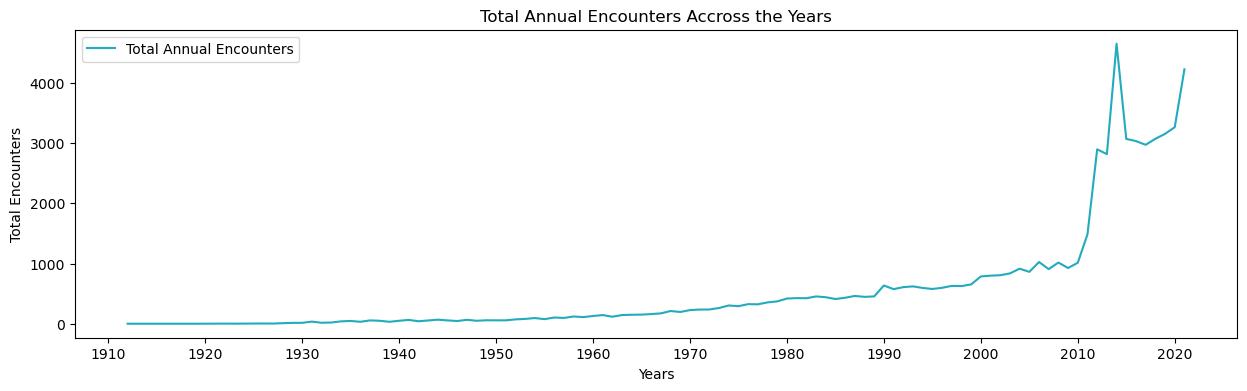

In [1299]:
plot_data = {
    "data": yearly_encounters_num,
    "label": "Total Annual Encounters",
    "color": "#22abbd"
}
plot_annual_time_series(plots_data = [plot_data], y_label="Total Encounters", title="Total Annual Encounters Accross the Years")

In [1300]:
#finding the peak year
print(f"The peak year is: {yearly_encounters_num.sort_values(ascending=False).index[0]}")

The peak year is: 2014


Finding and visualising the average number of all encounters per month

In [1301]:
date_encounters_df = encounter_lvl_df[["MONTH","YEAR", "ENCOUNTERCLASS"]]
encounters_per_year_n_month = date_encounters_df.pivot_table(index="YEAR", columns="MONTH", values="ENCOUNTERCLASS", aggfunc="count")
monthly_avg_encounters = encounters_per_year_n_month.mean()

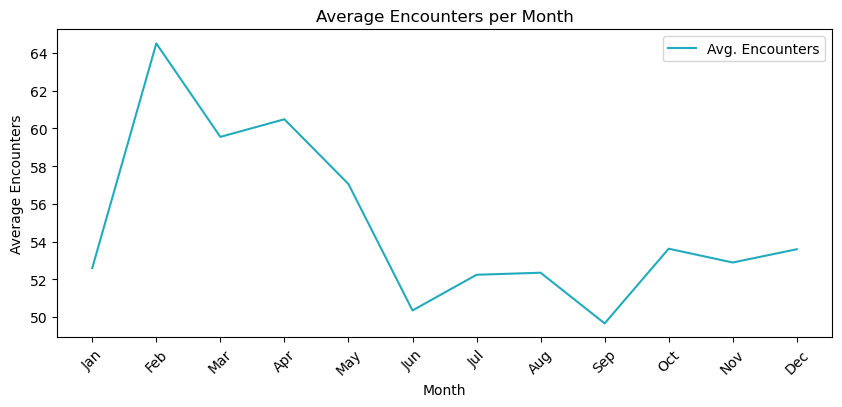

In [1302]:
plot_data = {
    "data": monthly_avg_encounters,
    "label": "Avg. Encounters",
    "color": "#22abbd"
}
plot_monthly_time_series(plots_data = [plot_data], y_label="Average Encounters", title="Average Encounters per Month")

Inspecting all the unique values in `ENCOUNTERCLASS`

In [1303]:
encounter_lvl_df.ENCOUNTERCLASS.value_counts()

ENCOUNTERCLASS
wellness      24038
ambulatory    20124
outpatient    10837
urgentcare     2564
emergency      2168
inpatient      1728
Name: count, dtype: int64

Admission was represented in the dataset as __'inpatient'__ encounter class, while Emergency Department (ED) visit was represented as __'emergency'__ encounter class.

## 1.0 Analysing and comparing the monthly fluctuations  
___Task:__ Analyse and compare the monthly fluctuations in admissions, ED visits, beddays (sum of LOS), and average LOS. Identify any significant anomalies or outliers._

### 1.1 Analysing the monthly fluctuations in admissions and ED visits (`inpatient` and `emergency` encounters)

In [1304]:
inpatientxemergency_df = encounter_lvl_df.loc[encounter_lvl_df.ENCOUNTERCLASS.isin(["inpatient", "emergency"]), ["YEAR","MONTH","ENCOUNTERCLASS"]]
inpatient_pivot = inpatientxemergency_df[encounter_lvl_df.ENCOUNTERCLASS == "inpatient"].pivot_table(index="YEAR", columns=["MONTH"], values="ENCOUNTERCLASS", aggfunc="count")
emergency_pivot = inpatientxemergency_df[encounter_lvl_df.ENCOUNTERCLASS == "emergency"].pivot_table(index="YEAR", columns=["MONTH"], values="ENCOUNTERCLASS", aggfunc="count")
inpatient_pivot

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
YEAR,,,,,,,,,,,,
1928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1931,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1952,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2017,4.0,8.0,7.0,5.0,4.0,8.0,5.0,3.0,2.0,6.0,1.0,6.0
2018,6.0,4.0,5.0,7.0,4.0,11.0,9.0,4.0,5.0,7.0,8.0,7.0
2019,3.0,5.0,6.0,8.0,11.0,11.0,9.0,10.0,9.0,11.0,23.0,27.0


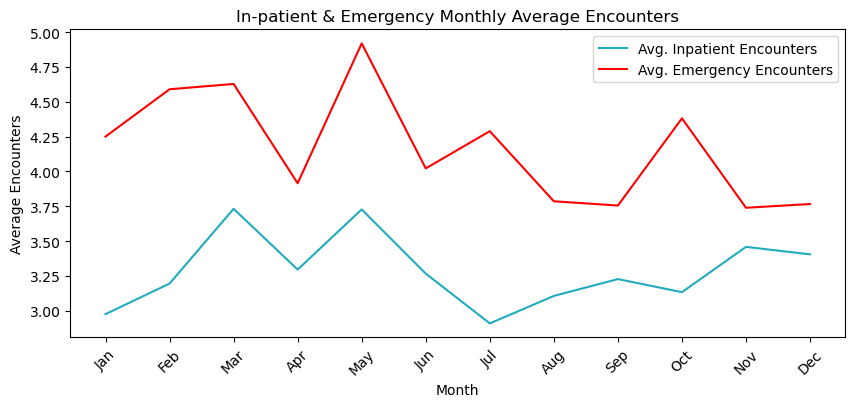

In [1305]:
inpatient_plot_data = {
    "data": inpatient_pivot.mean(),
    "label": "Avg. Inpatient Encounters",
    "color": "#22abbd"
}

emergency_plot_data = {
    "data": emergency_pivot.mean(),
    "label": "Avg. Emergency Encounters",
    "color": "red"
}

plot_monthly_time_series(plots_data = [inpatient_plot_data, emergency_plot_data], y_label="Average Encounters", title="In-patient & Emergency Monthly Average Encounters")

### 1.2 Analysing the monthly fluctuations in bed-days (sum of `LOS_DAYS`)

**Checking the monthly fluctuations in bed-days of Inpatients**

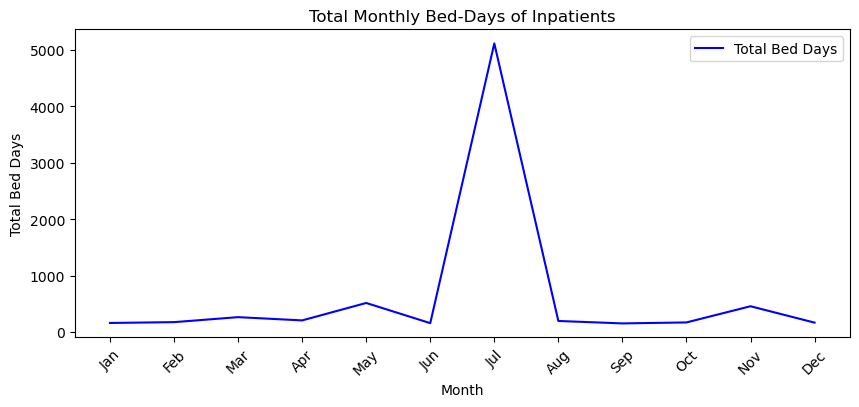

In [1306]:
los_df = encounter_lvl_df[encounter_lvl_df.ENCOUNTERCLASS == "inpatient"][["YEAR","MONTH","LOS_DAYS"]]
los_pivot = los_df.pivot_table(index="YEAR", columns=["MONTH"], values="LOS_DAYS", aggfunc="sum")

plot_data = {
    "data": los_pivot.sum(),
    "label": "Total Bed Days",
    "color": "blue"
}
plot_monthly_time_series(plots_data = [plot_data], y_label="Total Bed Days", title="Total Monthly Bed-Days of Inpatients")

Visualising the trend of bed-days of July inpatients over the years to confirm if there is a consistent trend or there is an outlier

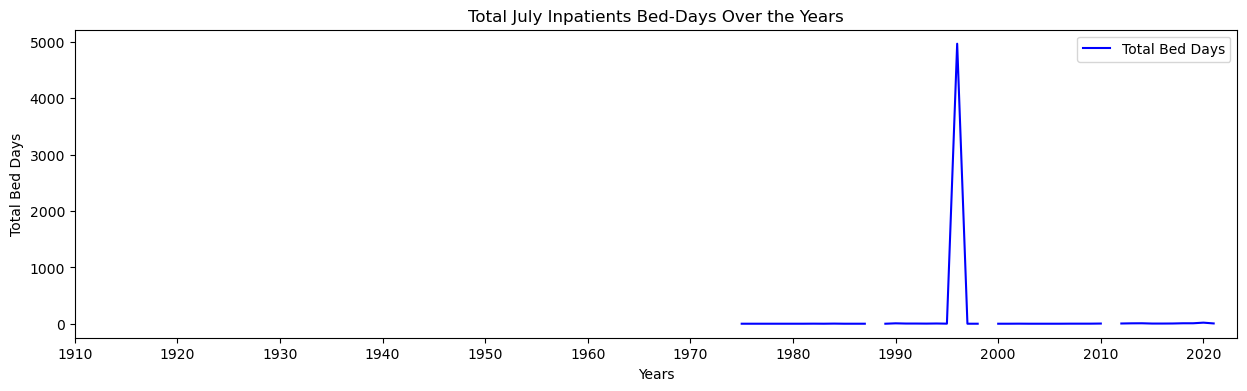

In [1307]:
plot_data = {
    "data": los_pivot[7].sort_index(),
    "label": "Total Bed Days",
    "color": "blue"
}
plot_annual_time_series(plots_data = [plot_data], y_label="Total Bed Days", title="Total July Inpatients Bed-Days Over the Years")

Checking which particular year is having this abnormal spike

In [1308]:
los_pivot[7].sort_values(ascending=False).head(3)

YEAR
1996    4970.000000
2020      20.030521
2019       9.000000
Name: 7, dtype: float64

There was an abnormally high total bed-days in __July of 1996__. This observation will be regarded as an outlier but will not be removed for the purpose of the analysis as it may represent genuine high-utilisation cases which are operatinoally meaningful.

**Checking the monthly fluctuations in bed-days of Emergencies**

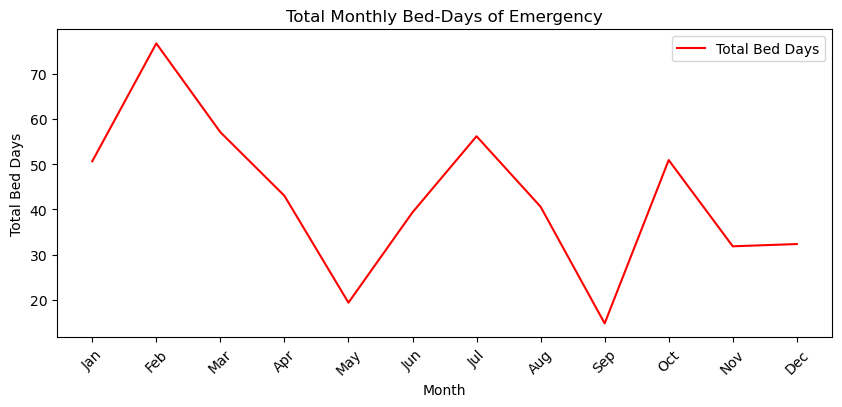

In [1309]:
los_df = encounter_lvl_df[encounter_lvl_df.ENCOUNTERCLASS == "emergency"][["YEAR","MONTH","LOS_DAYS"]]
los_pivot = los_df.pivot_table(index="YEAR", columns=["MONTH"], values="LOS_DAYS", aggfunc="sum")

plot_data = {
    "data": los_pivot.sum(),
    "label": "Total Bed Days",
    "color": "red"
}
plot_monthly_time_series(plots_data = [plot_data], y_label="Total Bed Days", title="Total Monthly Bed-Days of Emergency")

### 1.2 Analysing the average monthly fluctuations for `LOS_DAYS`

Checking the monthly average fluctuations in bed-days of Inpatients

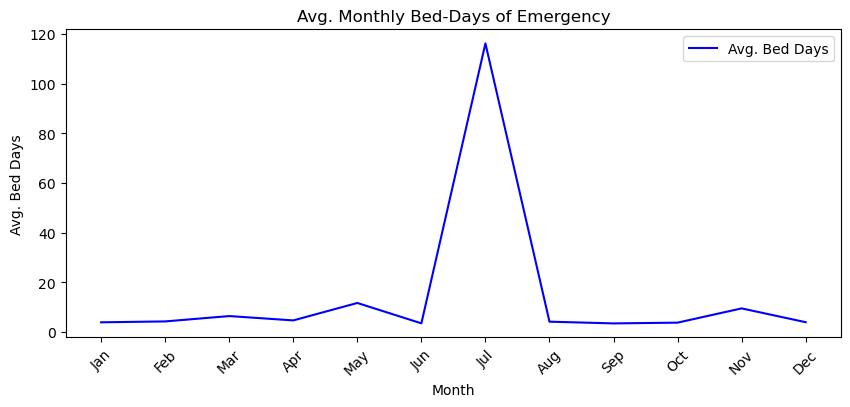

In [1310]:
los_df = encounter_lvl_df[encounter_lvl_df.ENCOUNTERCLASS == "inpatient"][["YEAR","MONTH","LOS_DAYS"]]
los_pivot = los_df.pivot_table(index="YEAR", columns=["MONTH"], values="LOS_DAYS", aggfunc="sum")

plot_data = {
    "data": los_pivot.mean(),
    "label": "Avg. Bed Days",
    "color": "blue"
}
plot_monthly_time_series(plots_data = [plot_data], y_label="Avg. Bed Days", title="Avg. Monthly Bed-Days of Emergency")

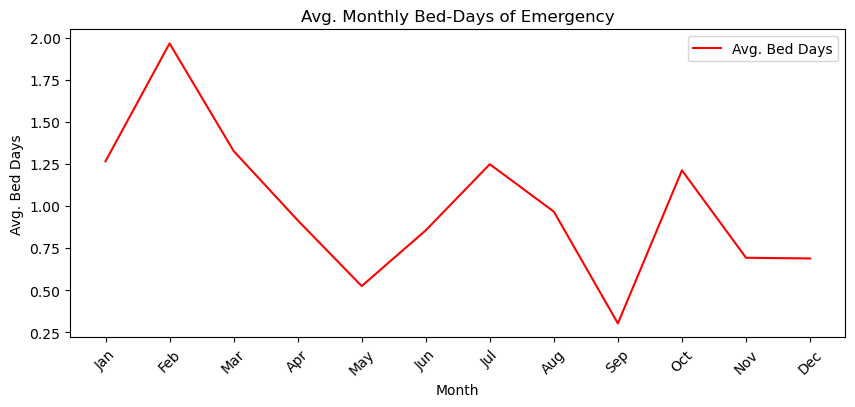

In [1311]:
los_df = encounter_lvl_df[encounter_lvl_df.ENCOUNTERCLASS == "emergency"][["YEAR","MONTH","LOS_DAYS"]]
los_pivot = los_df.pivot_table(index="YEAR", columns=["MONTH"], values="LOS_DAYS", aggfunc="sum")

plot_data = {
    "data": los_pivot.mean(),
    "label": "Avg. Bed Days",
    "color": "red"
}
plot_monthly_time_series(plots_data = [plot_data], y_label="Avg. Bed Days", title="Avg. Monthly Bed-Days of Emergency")

## 2.0 Analysing the Total Bed Days of Each Service Lines and Diagnosis  
___Task:__ Determine which service lines (ED/inpatient/outpatient) and diagnosis categories have the highest total bed-days, and weather they show consistent growth over time. Identify any categories with sustained increases._

### 2.1 Service Lines Analysis
Finding the service lines (emergency/inpatient/outpatient) with the highest bed days

In [1312]:
focus_encounters_df = encounter_lvl_df[encounter_lvl_df.ENCOUNTERCLASS.isin(["inpatient", "outpatient","emergency"])][["YEAR","MONTH","ENCOUNTERCLASS","LOS_DAYS"]] #filter the data of year, month, and LOS for emergency encounter class
focus_encounters_df[["ENCOUNTERCLASS","LOS_DAYS"]].groupby("ENCOUNTERCLASS").sum().sort_values(by="LOS_DAYS", ascending=False)

,LOS_DAYS
ENCOUNTERCLASS,
inpatient,7720.979363
outpatient,2877.863368
emergency,512.746296


`inpatient` service line has the highest bed-days with around 7,720 bed days across the time period

Analysing Annual __In-Patient__ visits to find any consistent growth

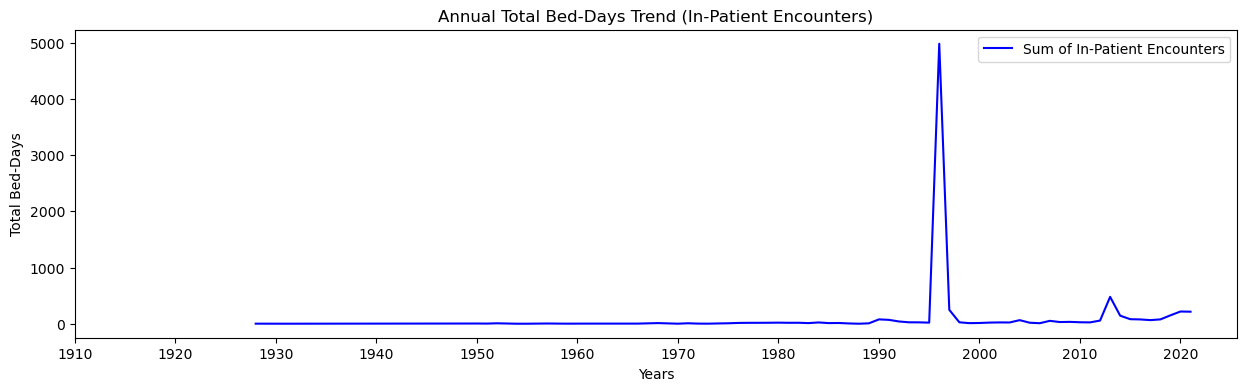

In [1313]:
inpatient_sum_plot_data = {
    "data": focus_encounters_df[focus_encounters_df.ENCOUNTERCLASS == "inpatient"][["YEAR","LOS_DAYS"]].groupby("YEAR")["LOS_DAYS"].sum(),
    "label": "Sum of In-Patient Encounters",
    "color": "blue"
}
plot_annual_time_series(plots_data=[inpatient_sum_plot_data], y_label="Total Bed-Days", title="Annual Total Bed-Days Trend (In-Patient Encounters)")

Analysing the of Annual sum __Emergency__ Visits

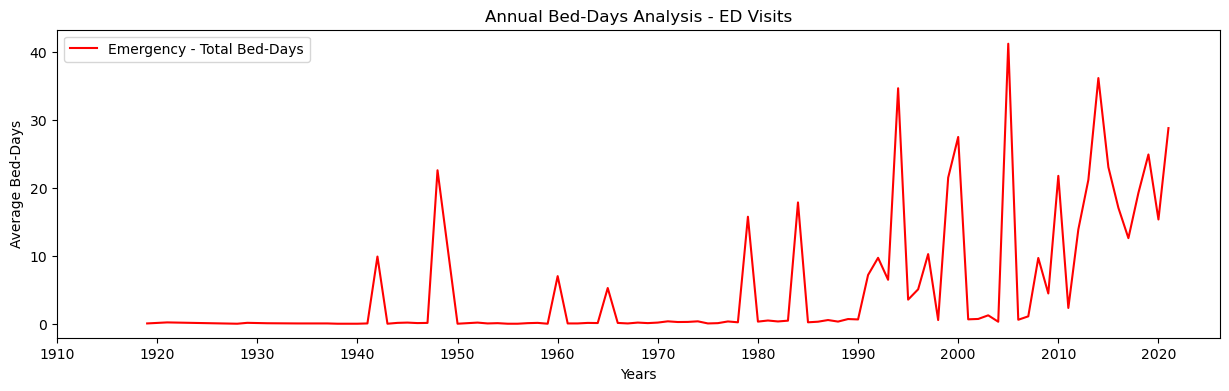

In [1314]:
emergency_plot_data = {
    "data": focus_encounters_df[focus_encounters_df.ENCOUNTERCLASS == "emergency"][["YEAR","LOS_DAYS"]].groupby("YEAR")["LOS_DAYS"].sum(),
    "label": "Emergency - Total Bed-Days",
    "color": "red"
}
plot_annual_time_series(plots_data = [emergency_plot_data], y_label="Average Bed-Days", title="Annual Bed-Days Analysis - ED Visits")

Analysing the of Annual sum __Outpatient__ Visits

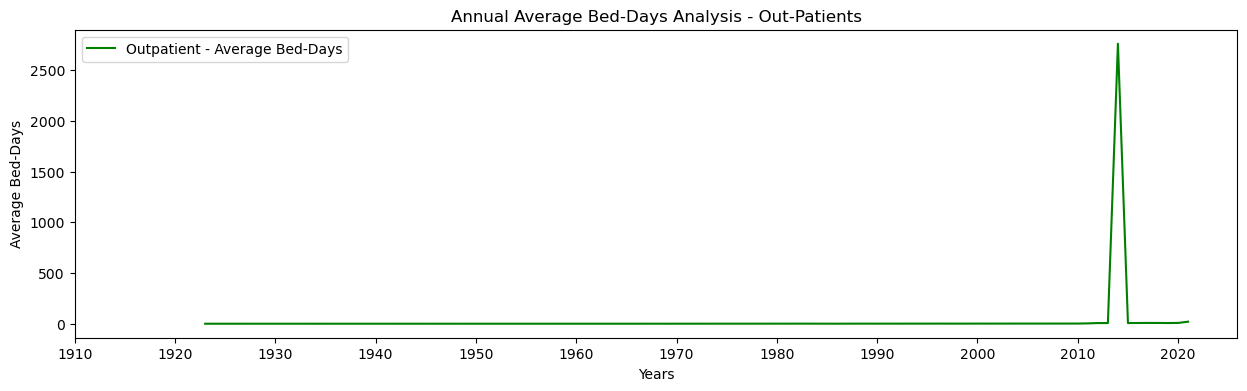

In [1315]:
outpatient_plot_data = {
    "data": focus_encounters_df[focus_encounters_df.ENCOUNTERCLASS == "outpatient"][["YEAR","LOS_DAYS"]].groupby("YEAR")["LOS_DAYS"].sum(),
    "label": "Outpatient - Average Bed-Days",
    "color": "green"
}
plot_annual_time_series(plots_data = [outpatient_plot_data], y_label="Average Bed-Days", title="Annual Average Bed-Days Analysis - Out-Patients")

### 2.2 Diagnosis Categories Analysis
Finding the diagnosis with the highest bed days

In [1316]:
highest_diag_codes = encounter_lvl_df[["LOS_DAYS", "PRIMARY_DIAG_CODE"]].groupby("PRIMARY_DIAG_CODE").sum().sort_values(by="LOS_DAYS", ascending=False).head()
print(f"Top 5 diagnosis with highest bed-days: \n{highest_diag_codes}")
print(f"\nThe diagnosis with the highest bed days is '{encounter_lvl_df[encounter_lvl_df.PRIMARY_DIAG_CODE == highest_diag_codes.index[0]]["PRIMARY_DIAG_DESC"].iloc[0]}' with code '{highest_diag_codes.index[0]}'")

Top 5 diagnosis with highest bed-days: 
                      LOS_DAYS
PRIMARY_DIAG_CODE             
185347001          9418.519294
185345009          5261.669525
183452005           471.204595
86013001            415.885972
1505002             207.465023

The diagnosis with the highest bed days is 'Encounter for problem' with code '185347001'


Visualising the annual trend of total bed-days for the __"Encounter for problem"__ diagnosis category

In [1317]:
highest_diag_df = encounter_lvl_df[encounter_lvl_df.PRIMARY_DIAG_CODE == highest_diag_codes.index[0]][["YEAR","MONTH","LOS_DAYS"]] #filtering the data of the highest diagnosis category by LOS

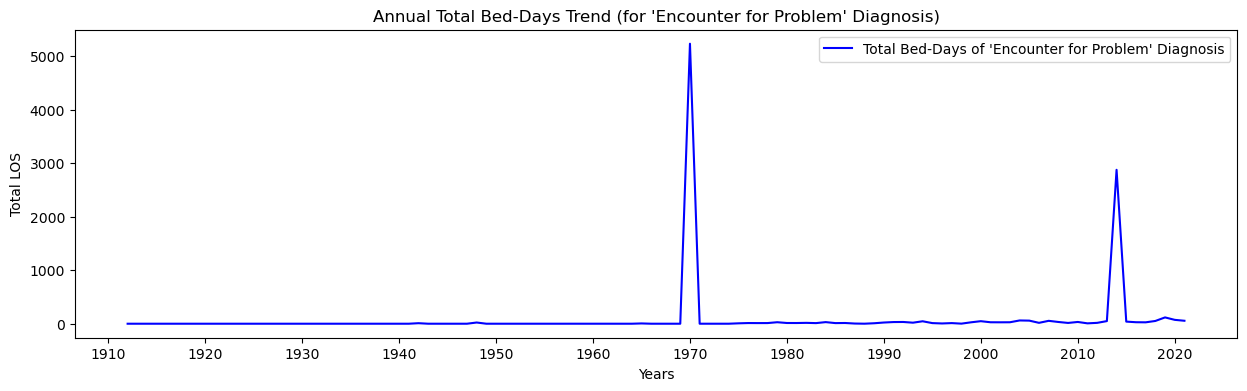

In [1318]:
#annually - total count
inpatient_sum_plot_data = {
    "data": highest_diag_df.groupby("YEAR")["LOS_DAYS"].sum(),
    "label": "Total Bed-Days of 'Encounter for Problem' Diagnosis",
    "color": "blue"
}
plot_annual_time_series(plots_data=[inpatient_sum_plot_data], y_label="Total LOS", title="Annual Total Bed-Days Trend (for 'Encounter for Problem' Diagnosis)")

Visualising time-series graphs to show the trend of bed-days for all diagnosis categories over years to find the categories with consistent growth over time.

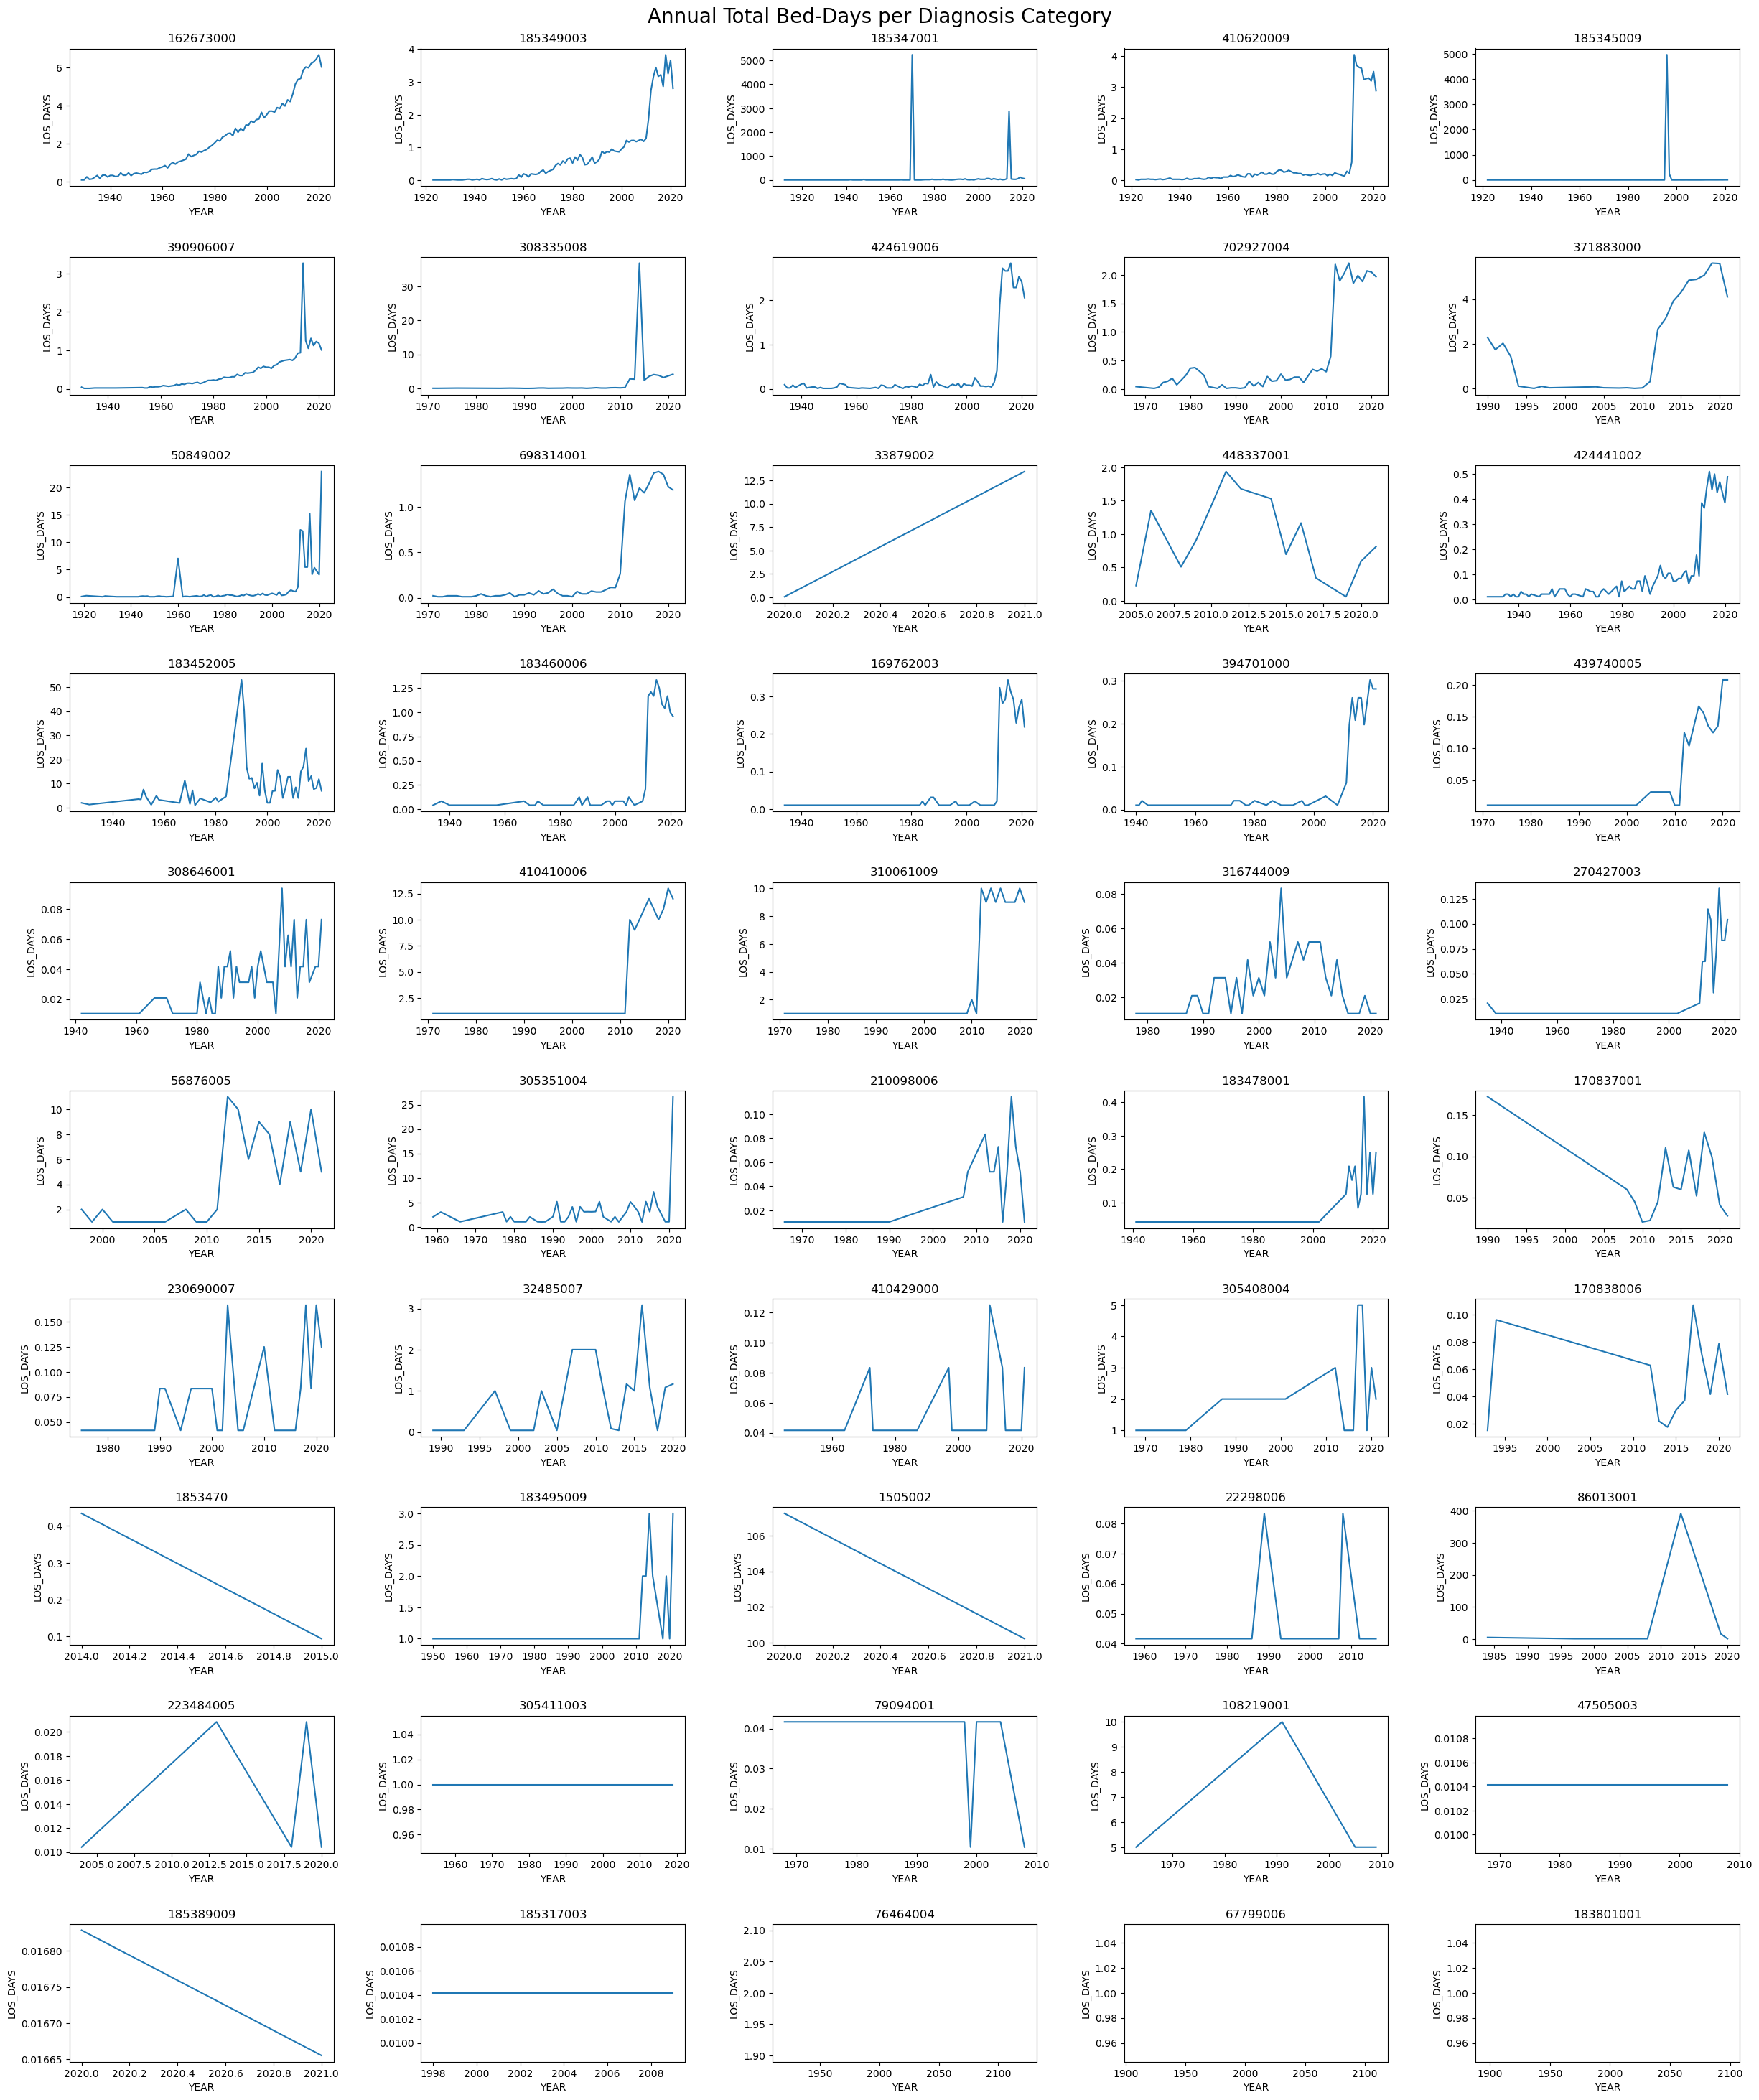

In [1319]:
diag_df = encounter_lvl_df[["YEAR","LOS_DAYS", "PRIMARY_DIAG_DESC","PRIMARY_DIAG_CODE"]]
diag_codes = list(diag_df.PRIMARY_DIAG_CODE.value_counts().index)
years_x_ticks = list(range(1910,2025,20))

rows = 10
cols = 5

#plotting a large object of subplots to show the trend of all diagnosis categories over the years
fig, axs = plt.subplots(rows,cols)
fig.set_figwidth(25)
fig.set_figheight(30)
index_count = 0
row_count = 0
while row_count < rows:
    col_count = 0
    while col_count < cols:
        if index_count < len(diag_codes):
            data = diag_df[diag_df.PRIMARY_DIAG_CODE == diag_codes[index_count]].groupby("YEAR", sort=True)["LOS_DAYS"].sum()
            axs[row_count][col_count].set_title(diag_codes[index_count])
            # axs[row_count][col_count].xticks(ticks = years_x_ticks)
            sub_plot = sns.lineplot(data, ax = axs[row_count][col_count])
            # sub_plot.set_xticks(years_x_ticks)
        else: break
        col_count += 1
        index_count += 1
    row_count+=1

fig.suptitle("Annual Total Bed-Days per Diagnosis Category", fontsize = 20)
plt.tight_layout(pad=2.5)
plt.show()

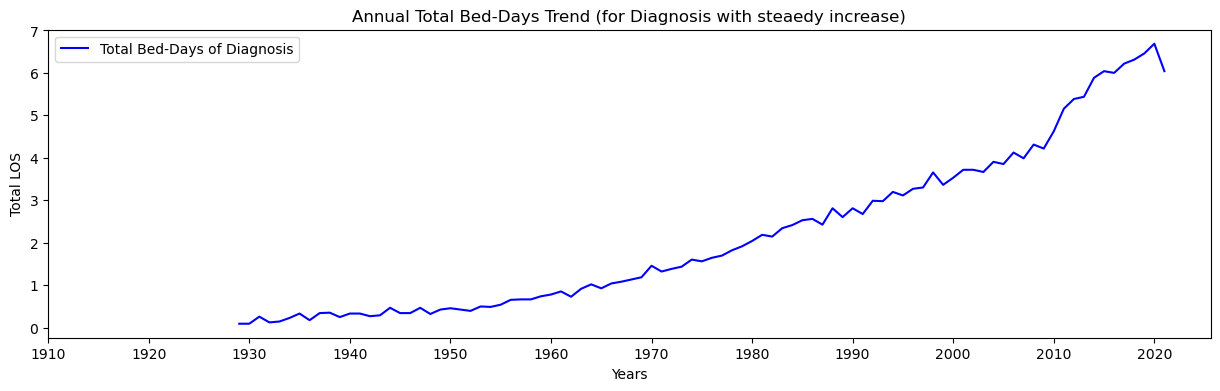

In [1320]:
#annually - total count
inpatient_sum_plot_data = {
    "data": diag_df[diag_df.PRIMARY_DIAG_CODE == 162673000].groupby("YEAR", sort=True)["LOS_DAYS"].sum(),
    "label": "Total Bed-Days of Diagnosis",
    "color": "blue"
}
plot_annual_time_series(plots_data=[inpatient_sum_plot_data], y_label="Total LOS", title="Annual Total Bed-Days Trend (for Diagnosis with steaedy increase)")


As visualised above, diagnosis codes that showed consistent growth in total bed-days over time are the following:

In [1321]:
diag_codes = [162673000, 185349003, 390906007, 702927004, 50849002, 698314001, 424441002, 308646001]
pd.DataFrame(list(diag_df[diag_df.PRIMARY_DIAG_CODE.isin(diag_codes)][["PRIMARY_DIAG_CODE", "PRIMARY_DIAG_DESC"]].value_counts().index), columns=["Diagnosis Code", "Diagnosis Description"]) ##getting the descriptions of each diagnosis code having consistent growth over time and viewing them

,Diagnosis Code,Diagnosis Description
0,162673000,General examination of patient (procedure)
1,185349003,Encounter for check up (procedure)
2,702927004,Urgent care clinic (procedure)
3,390906007,Follow-up encounter
4,698314001,Consultation for treatment
5,185349003,Encounter for 'check-up'
6,50849002,Emergency room admission (procedure)
7,424441002,Prenatal initial visit
8,50849002,Emergency Encounter
9,50849002,Emergency Room Admission


The diagnosis with the most steady consistent rate of increase over time is the "General examination of patient (procedure)" with code 162673000. The trend visualisation shows a polynomial rate of increase over time.

## 3.0 Exploring the seasonal variations across major diagnosis
__Task:__ Explore the seasonal variations by month in utilisation across major diagnosis groups. Are there any categories that are sensitive to specific time periods?

In [1322]:
#tabulating the seasons in the UK
seasons = pd.DataFrame({
    "Winter" : [12,1,2], #December - February
    "Spring" : [3,4,5], #March - May
    "Summer" : [6,7,8], #June - August
    "Autumn" : [9,10,11], #September - November
}, index=["Start", "Mid", "End"])

#assigning IDs to the seasons
seasons_ids = {
    "Winter" : 1,
    "Spring" : 2,
    "Summer" : 3,
    "Autumn" : 4,
}

print(seasons_ids)
seasons

{'Winter': 1, 'Spring': 2, 'Summer': 3, 'Autumn': 4}


,Winter,Spring,Summer,Autumn
Start,12,3,6,9
Mid,1,4,7,10
End,2,5,8,11


In [1323]:
data = np.where(encounter_lvl_df.MONTH.isin(seasons.Winter), seasons_ids["Winter"], 
                np.where(encounter_lvl_df.MONTH.isin(seasons.Spring), seasons_ids["Spring"],
                np.where(encounter_lvl_df.MONTH.isin(seasons.Summer), seasons_ids["Summer"],seasons_ids["Autumn"])))
encounter_lvl_df.insert(list(encounter_lvl_df.columns).index("MONTH") + 1, "SEASON_ID", data) #categorise the months into seasons and insert it into the dataframe just after the "MONTH" column
encounter_lvl_df.head(2)

,ID,PATIENT,START,STOP,YEAR,MONTH,SEASON_ID,ENCOUNTERCLASS,PROVIDER,LOS_DAYS,TOTAL_COST,AGE_AT_START,PRIMARY_DIAG_CODE,PRIMARY_DIAG_DESC
0,748f8357-6cc7-551d-f31a-32fa2cf84126,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-02-17 05:07:38,2019-02-17 05:22:38,2019,2,1,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,0.010417,877.79,0.000000,410620009,Well child visit (procedure)
1,5a4735ae-423f-6563-28ab-b3d11b49b2d4,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-03-24 05:07:38,2019-03-24 05:22:38,2019,3,2,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,0.010417,269.68,0.095825,410620009,Well child visit (procedure)


In [1324]:
#get top 6 diagnosis by count
top_6_diag_count = encounter_lvl_df.PRIMARY_DIAG_CODE.value_counts(ascending=False).head(6)
print("Top 6 diagnosis codes by count")
top_6_diag_count

Top 6 diagnosis codes by count


PRIMARY_DIAG_CODE
162673000    19374
185349003     5812
185347001     5245
410620009     4507
185345009     4261
390906007     3041
Name: count, dtype: int64

In [1325]:
#get the season data of the top 6 diagnosis
diag_by_season = encounter_lvl_df[encounter_lvl_df.PRIMARY_DIAG_CODE.isin(top_6_diag_count.index)][["SEASON_ID", "PRIMARY_DIAG_CODE"]]
diag_by_season_crosstab = pd.crosstab(index = diag_by_season.SEASON_ID, columns = diag_by_season.PRIMARY_DIAG_CODE, )
diag_by_season_crosstab

PRIMARY_DIAG_CODE,162673000,185345009,185347001,185349003,390906007,410620009
SEASON_ID,,,,,,
1,5260,1064,1425,1415,699,1073
2,5050,1063,1307,1458,715,1170
3,4547,1047,1201,1470,788,1176
4,4517,1087,1312,1469,839,1088


In [1326]:
#checking correlation betweeen diagnosis_id and season_id
diag_by_season.corr()

,SEASON_ID,PRIMARY_DIAG_CODE
SEASON_ID,1.000000,0.028937
PRIMARY_DIAG_CODE,0.028937,1.000000


There is no correlation between season and diagnosis

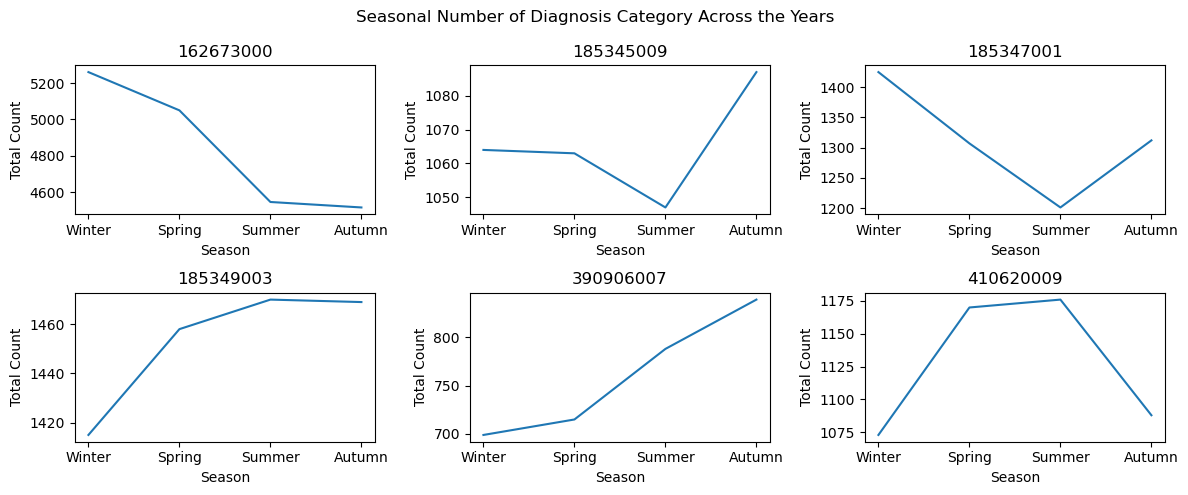

In [1327]:
#plot the combo graph that shows all categories' tred over the seasons
diag_codes = diag_by_season_crosstab.columns

rows = 2
cols = 3

#plotting a large object of subplots to show the trend of all diagnosis categories over the years
fig, axs = plt.subplots(rows,cols)
fig.set_figwidth(12)
fig.set_figheight(5)
index_count = 0
row_count = 0
while row_count < rows:
    col_count = 0
    while col_count < cols:
        if index_count < len(diag_codes):
            data = diag_by_season_crosstab[diag_codes[index_count]]
            axs[row_count][col_count].set_title(diag_codes[index_count])
            sub_plot = sns.lineplot(data, ax = axs[row_count][col_count])
            sub_plot.set_xticks(ticks = list(seasons_ids.values()), labels = list(seasons_ids.keys()))
            sub_plot.set_xlabel("Season")
            sub_plot.set_ylabel("Total Count")
        else: break
        col_count += 1
        index_count += 1
    row_count+=1

fig.suptitle("Seasonal Number of Diagnosis Category Across the Years")
plt.tight_layout()
plt.show()

## 4.0 Analysing Shifts in Patient Journeys Across Multiple Encounters
__Task:__ Analyse shifts in patient journeys across multiple encounters, including 30-day readmissions, to identify recurring patterns or significant changes in pathways. Determine whether these trends can provide actionable insights for capacity planning, discharge planning, and targeted follow-up

### 4.1 Analysing the Patient Timelines to Study the Pathways

**1. Sorting the dataset by the `PATIENT` and `START` date in ascending order so that the encounter-class journey of a patient can be analysed**

In [1328]:
#sort the dataframe by PATIENT and START attributes
sorted_encounters_df = encounter_lvl_df.sort_values(["PATIENT", "START"])
sorted_encounters_df.head()

,ID,PATIENT,START,STOP,YEAR,MONTH,SEASON_ID,ENCOUNTERCLASS,PROVIDER,LOS_DAYS,TOTAL_COST,AGE_AT_START,PRIMARY_DIAG_CODE,PRIMARY_DIAG_DESC
35318,39fad31f-f0e2-061f-2a6b-dec159df271a,00126cb9-8460-4747-e302-c3609684531e,2005-07-23 23:28:56,2005-07-23 23:43:56,2005,7,3,wellness,c356746e-d1c8-3a3e-b4e7-fffa0e98da76,0.010417,1212.05,18.149213,162673000,General examination of patient (procedure)
35319,482f855e-39e7-9145-7f19-8924573ab8b7,00126cb9-8460-4747-e302-c3609684531e,2005-08-22 23:28:56,2005-08-22 23:43:56,2005,8,3,ambulatory,c4d2ed7d-e1b3-37e2-82f9-b21046309ba4,0.010417,77.49,18.231348,390906007,Hypertension follow-up encounter
35320,0b1d4e8a-61dd-b713-bada-b6f66eb678b6,00126cb9-8460-4747-e302-c3609684531e,2006-07-29 23:28:56,2006-07-29 23:43:56,2006,7,3,wellness,c356746e-d1c8-3a3e-b4e7-fffa0e98da76,0.010417,786.33,19.164956,162673000,General examination of patient (procedure)
35321,86c47926-8246-7203-4157-314c7f5b23ed,00126cb9-8460-4747-e302-c3609684531e,2007-08-04 23:28:56,2007-08-04 23:43:56,2007,8,3,wellness,c356746e-d1c8-3a3e-b4e7-fffa0e98da76,0.010417,1497.66,20.180698,162673000,General examination of patient (procedure)
35322,dec0f17f-c805-6c2b-d962-fbb0c120bdb0,00126cb9-8460-4747-e302-c3609684531e,2008-08-09 23:28:56,2008-08-09 23:43:56,2008,8,3,wellness,c356746e-d1c8-3a3e-b4e7-fffa0e98da76,0.010417,1635.52,21.196441,162673000,General examination of patient (procedure)


**2. Calculating and analysing inpatients with 30 day readmissions**

In [1329]:
sorted_encounters_df["30_DAY_READMISSION"] = pd.Series(np.zeros(len(sorted_encounters_df))).astype("Int16") #create a column for storing the state of readmissions and fill it with default value 0

In [1330]:
prev_inpatient = pd.DataFrame() #for storing the details of the previous 'inpatient' encounter

def detect_30_day_readmission(encounter_id):
    global prev_inpatient
    inpatient_data = sorted_encounters_df[sorted_encounters_df.ID == encounter_id][["PATIENT", "START", "STOP"]]#get the inpatient encounter data
    is_true = 0

    #confirming if its still the same patient then comparing previous stop and current start dates
    if (len(prev_inpatient) > 0) and (inpatient_data["PATIENT"].values[0] == prev_inpatient["PATIENT"].values[0]):
        is_true = 1 if (inpatient_data["START"].values[0] - prev_inpatient["STOP"].values[0])/np.timedelta64(1,"D") <= 30 else 0 #compare the dates to detect if its a 30-day readmission
    
    prev_inpatient = inpatient_data #save this current in-patient data as the new previous inpatient data
    return is_true

# thirty_day_readmission_states = sorted_encounters_df[sorted_encounters_df.ENCOUNTERCLASS == "inpatient"]["ID"].apply(detect_30_day_readmission)
thirty_day_readmission_states = sorted_encounters_df[sorted_encounters_df.ENCOUNTERCLASS == "inpatient"]["ID"].apply(detect_30_day_readmission)

sorted_encounters_df["30_DAY_READMISSION"] = thirty_day_readmission_states.astype("Int16") #insert the data into the created column
sorted_encounters_df["30_DAY_READMISSION"].fillna(0, inplace = True) #the operation above will have created a bunch of NaNs, replace them with 0
sorted_encounters_df[sorted_encounters_df["30_DAY_READMISSION"] == 1].head()

,ID,PATIENT,START,STOP,YEAR,MONTH,SEASON_ID,ENCOUNTERCLASS,PROVIDER,LOS_DAYS,TOTAL_COST,AGE_AT_START,PRIMARY_DIAG_CODE,PRIMARY_DIAG_DESC,30_DAY_READMISSION
15275,57a42a04-f4f4-ef51-1f09-f0492410ba18,03e502b6-b810-06c1-7d65-83db077ed3ee,2019-06-16 11:29:07,2019-06-17 11:29:07,2019,6,3,inpatient,da3170c9-722b-3ec4-b0a7-c8047575c63a,1.0,19457.70,51.693361,185347001,Encounter for problem,1
15278,0dcf0d6c-b512-b3f5-bfaa-a4a88b7efce0,03e502b6-b810-06c1-7d65-83db077ed3ee,2019-09-21 22:45:07,2019-09-22 22:45:07,2019,9,4,inpatient,da3170c9-722b-3ec4-b0a7-c8047575c63a,1.0,15008.22,51.958932,185347001,Encounter for problem,1
15282,9e0e1a6d-6d80-89d4-60c3-edbec8a1d5bf,03e502b6-b810-06c1-7d65-83db077ed3ee,2019-11-23 17:43:07,2019-11-24 17:43:07,2019,11,4,inpatient,da3170c9-722b-3ec4-b0a7-c8047575c63a,1.0,15153.90,52.131417,185347001,Encounter for problem,1
15284,32c93866-e706-ffa5-fcbf-1014afbf993f,03e502b6-b810-06c1-7d65-83db077ed3ee,2020-01-25 05:05:07,2020-01-26 05:05:07,2020,1,1,inpatient,da3170c9-722b-3ec4-b0a7-c8047575c63a,1.0,19823.58,52.303901,185347001,Encounter for problem,1
15286,a796eb29-821e-0d79-d19f-ada32b2a91cd,03e502b6-b810-06c1-7d65-83db077ed3ee,2020-03-26 15:55:07,2020-03-27 15:55:07,2020,3,2,inpatient,da3170c9-722b-3ec4-b0a7-c8047575c63a,1.0,10664.20,52.470910,185347001,Encounter for problem,1


**Analysing the annual trend of 30-Day readmissions**

In [1331]:
thirty_day_readm_data = sorted_encounters_df[["YEAR","30_DAY_READMISSION"]].groupby("YEAR").sum()#filter the data for 30 days readmission encounters
thirty_day_readm_data.sort_values(by="30_DAY_READMISSION",ascending=False).head(6)#show the years with highest number of 30 day readmissions

,30_DAY_READMISSION
YEAR,
2014,91
2019,80
2020,43
2013,41
2021,38
2004,37


2014 has the highest number of readmissions with 91 readmission that year followed by 2019 with 80 readmissions 

In [1332]:
thirty_day_readm_data[thirty_day_readm_data["30_DAY_READMISSION"] > 0].sort_values(by="30_DAY_READMISSION").head(3) #show the years with lowest number of 30 day readmissions

,30_DAY_READMISSION
YEAR,
1971,1
2006,1
2005,1


The least number of readmissions per year is 1 starting from the year 1971

**Visualising the trend of annual readmissions over time**

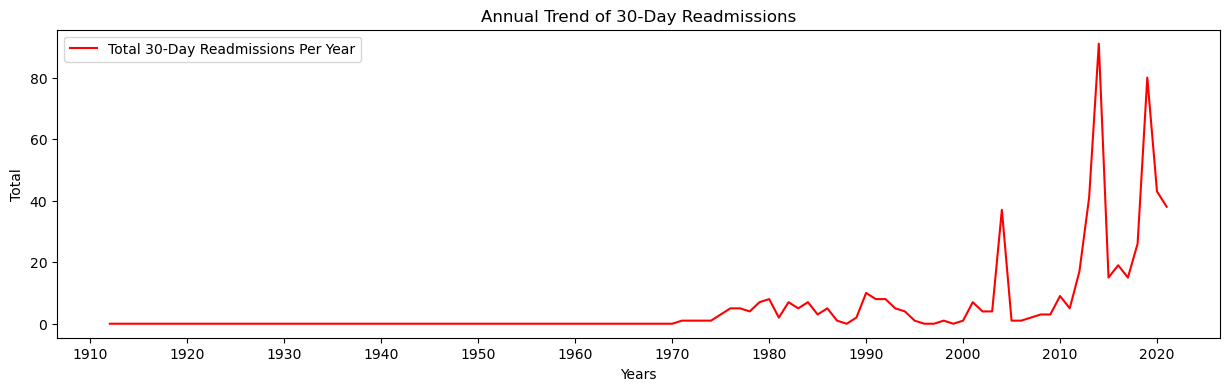

In [1333]:
readm_plot_data = {
    "data": thirty_day_readm_data,
    "label": "Total 30-Day Readmissions Per Year",
    "color": "red"
}
plot_annual_time_series(plots_data=[readm_plot_data], y_label="Total", title="Annual Trend of 30-Day Readmissions")

According to the analysed data, 30-Day readmissions started occuring from 1971 and gradually increased accross the years. However, there was an abnormall spike in 30-day readmissions in 2004 which reduced the following year. The second recorded spike in 30-day readmissions occured between 2013 to 2014 which was over double of the scale of readmissions in 2004. This observed spike greatly reduced the following year but increased again between 2018 and 2019. The level of readmissions reduced in 2020 and continued to reduce in 2021.  

This high volume may also be attributed to the consistent increase in encounters from the 2000s but more importantly these consistent spikes may indicate an increased need for enhanced transitional care.

**Calculating the rate of readmissions over time**

In [1334]:
all_inpatients_per_year = pd.crosstab(index = sorted_encounters_df["YEAR"], columns = sorted_encounters_df["ENCOUNTERCLASS"])["inpatient"] 
rate_of_readm_over_time = ((thirty_day_readm_data["30_DAY_READMISSION"]/all_inpatients_per_year) * 100).astype("Int16") #calculate the rate of readmissions per year => total count of readmissions / total count of inpatients = rate of readmissions

#tabulating our result
readmission_rate_table = pd.DataFrame({
    "Inpatients": all_inpatients_per_year.values,
    "30-Day Readmissions": thirty_day_readm_data["30_DAY_READMISSION"].values,
    "Rate(%)": rate_of_readm_over_time.values
}, index = rate_of_readm_over_time.index)

readmission_rate_table.sort_values(by="Rate(%)", ascending=False).head()

,Inpatients,30-Day Readmissions,Rate(%)
YEAR,,,
2014,143,91,63
2004,59,37,62
2019,133,80,60
1973,2,1,50
1980,17,8,47


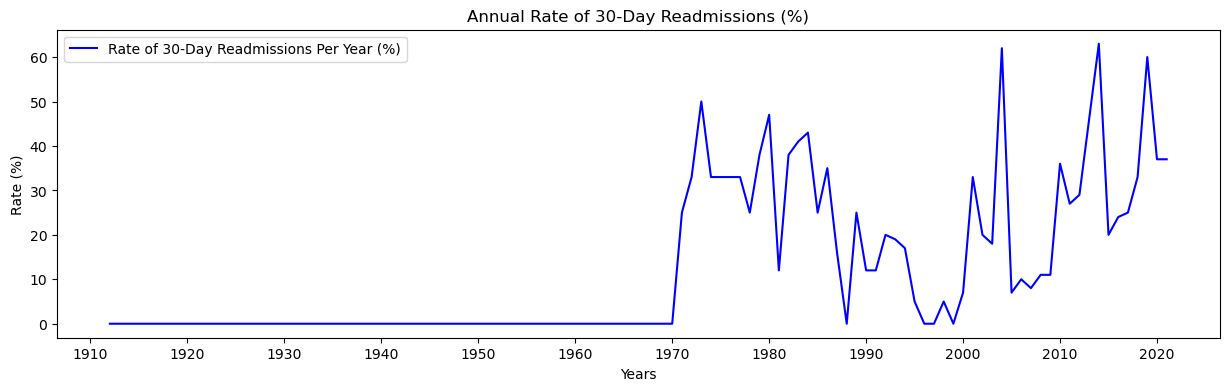

In [1335]:
rate_of_readm_plot_data = {
    "data": readmission_rate_table["Rate(%)"],
    "label": "Rate of 30-Day Readmissions Per Year (%)",
    "color": "blue"
}
plot_annual_time_series(plots_data=[rate_of_readm_plot_data], y_label="Rate (%)", title="Annual Rate of 30-Day Readmissions (%)")

The ratio of readmissions to total inpatients appears to have been avergaly high between 1970 and 1989 with a dip between 1990 to 2000 and periodic spikes between 5-year intervals from 2001 to 2020. __The Year with the highest rate of readmission remains 2014 with 63% rate of readmissions.__

**4. Understanding patients' typical pathways**

Patterns I'm looking out for that can help with resource planning are shown in the table below:

| PATTERN                           | ID
| ----------------------------------|-----------------------------------
| outpatient -> ED -> inpatient     | 1
| outpatient -> inpatient           | 2
| inpatient -> ED                   | 3

In [1336]:
patterns = {#each pattern sub-array represent the order or encounters to find
    "ENCOUNTER_CLASS":[["outpatient", "emergency", "inpatient"],
                       ["outpatient", "inpatient"],
                       ["inpatient", "emergency"]],
    "30_DAYS_ADMISSION": [False, False, False] #30 days additonal rule to consider when there is an 'inpatient' class in the pattern
}

In [1337]:
focus_data_encounter = sorted_encounters_df[["PATIENT","START", "STOP", "YEAR", "ENCOUNTERCLASS", "30_DAY_READMISSION"]]
focus_data_encounter.reset_index(drop = True, inplace = True) #reset the index because of the next set of activities to be done

In [1338]:
pat_found_array = pd.Series(np.zeros(len(focus_data_encounter))).astype("Int16")

row_id = 0
while row_id < len(focus_data_encounter): #for every row
    pattern_id = 0
    for encounter_pattern in patterns["ENCOUNTER_CLASS"]:#start tracking patterns
        char_id = 0
        while char_id < len(encounter_pattern):
            #get row at row_id + pat_item_id as long as we are not out of bounds of the dataframe
            if ((row_id + char_id >= len(focus_data_encounter)) or (focus_data_encounter.iloc[row_id + char_id].ENCOUNTERCLASS != encounter_pattern[char_id])): #if the pattern check fails, break the loop immediately, there is no point continuing
                break
            else:
                if ((patterns["30_DAYS_ADMISSION"][pattern_id] == True) and (focus_data_encounter.iloc[row_id + char_id]["30_DAY_READMISSION"] != 1)): #check if 30 day readmission period should be checked on inpatient pattern
                    break
                else: 
                    char_id += 1 #continue checking next pattern
        if (char_id == len(encounter_pattern)): #confirm if the while loop ended without breaking. if it did, there was a pattern match
            pat_found_array[row_id + char_id - 1] = pattern_id + 1 #save the pattern id at the row where it started scanning from (+1 because 0 is reserved for no patterns) 9as for the index, I am removing 1 because char_id should be less than len of the pattern
            break #there is no need to look for more patterns, break the for loop too
        pattern_id += 1
    row_id += 1

In [1339]:
focus_data_encounter["PATTERN_FOUND"] = pat_found_array 
focus_data_encounter[focus_data_encounter.PATTERN_FOUND != 0].head()

,PATIENT,START,STOP,YEAR,ENCOUNTERCLASS,30_DAY_READMISSION,PATTERN_FOUND
597,0354da61-b0c8-3469-d3f6-c2fd0f508b7a,2015-12-10 08:24:46,2015-12-11 08:24:46,2015,inpatient,0,1
835,03e502b6-b810-06c1-7d65-83db077ed3ee,2019-05-16 17:30:07,2019-05-17 17:30:07,2019,inpatient,0,2
868,03e502b6-b810-06c1-7d65-83db077ed3ee,2020-12-08 03:18:14,2020-12-08 04:18:14,2020,emergency,0,3
875,03e502b6-b810-06c1-7d65-83db077ed3ee,2021-04-07 23:10:07,2021-04-08 23:10:07,2021,inpatient,1,2
1313,06629c1a-687d-5121-1e28-ae123c1fe647,2019-03-18 07:48:55,2019-03-19 07:48:55,2019,inpatient,0,2


We have been able to detect crucial patterns in patients pathways that may help provide actionable insights for capacity planning, discharge planning, and targeted follow-up. As seen in the above table, patient `0354da61-b0c8-3469-d3f6-c2fd0f508b7a` in 2025, visited the hospital as an outpatient but later came in as an emergency and upon discharge, they were admitted again _(`pattern: outpatient -> ED -> inpatient`)_

In [1340]:
#summerising the data
patterns_data = pd.crosstab(index = focus_data_encounter[focus_data_encounter.PATTERN_FOUND != 0].YEAR, columns = focus_data_encounter[focus_data_encounter.PATTERN_FOUND != 0].PATTERN_FOUND)

**Visualising the three crucial patient pathways trends to detect growths**

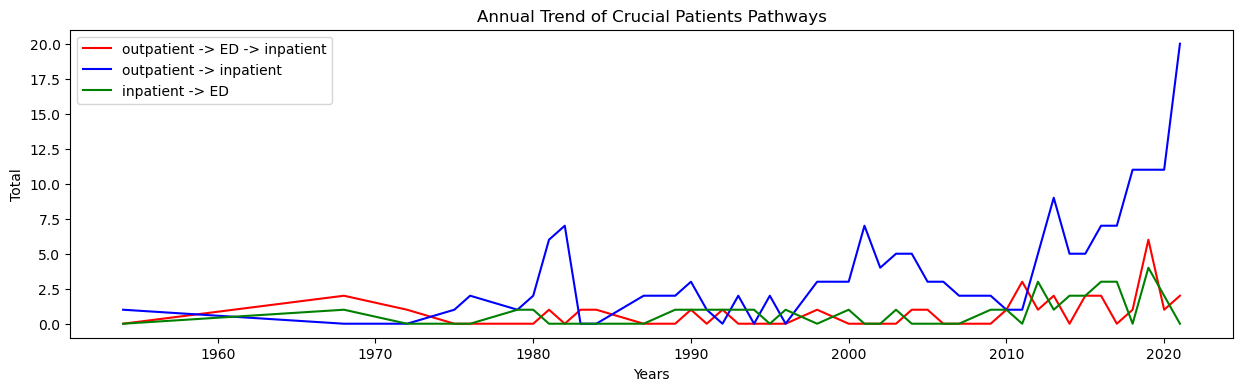

In [1341]:
pattern_1_plot_data = {
    "data": patterns_data[1],
    "label": "outpatient -> ED -> inpatient",
    "color": "red"
}

pattern_2_plot_data = {
    "data": patterns_data[2],
    "label": "outpatient -> inpatient",
    "color": "blue"
}

pattern_3_plot_data = {
    "data": patterns_data[3],
    "label": "inpatient -> ED",
    "color": "green"
}

plot_annual_time_series(plots_data=[pattern_1_plot_data, pattern_2_plot_data, pattern_3_plot_data], y_label="Total", title="Annual Trend of Crucial Patients Pathways", x_ticks_data=list(range(1960,2025,10)))

As shown in the time-series plot above, there is a consistent rising trend of patients starting out as outpatients then being admitted as inpatients after being discharged, this may be due to deterioration of health beyond what was previously observed the high volume may also be attributed to the consistent increase in encounters from the 2000s.  
These consistent increase may indicate an increased pressure on inpatient capacity.  

The slowly rising pattern of previously encountered outpatients later needing an emergency service and later admitted may indicate the need for proper discharge planning and targeted follow-up. This may also apply to the detected slowly increasing trend of inpatients later needing emergency services.